In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
import os

In [3]:
# Convert the data to a 2D array for training the LSTM model
def prepare_data(data, n_steps, threshold):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix >= len(data):
            break
        # only consider rows where the date_gap is less than the threshold
        if data.loc[end_ix, 'date_gap'] < threshold:
            # extract the input and output sequences
            seq_X, seq_y = data.iloc[i:end_ix, :-1].values, data.loc[end_ix, 'view_per_first']
            X.append(seq_X)
            y.append(seq_y)
    return np.array(X), np.array(y)

In [10]:
data = pd.read_csv('test.csv')
data.columns

# Select the columns you need for the LSTM model
columns = ['category_id', 'duration', 'date_diff', 'view_per_time', 'likes_per_first', 'likes_per_view', 'view_per_first']
data = data[columns]

Index(['Unnamed: 0', 'id', 'title', 'category_id', 'views', 'likes',
       'favorites', 'comments', 'date', 'date_gap', 'duration', 'tags',
       'date_diff', 'view_per_first', 'view_per_time', 'likes_per_first',
       'likes_per_view'],
      dtype='object')

In [4]:
# set the directory path containing the CSV files
directory = 'data/videos'
columns = ['category_id', 'duration', 'date_diff', 'view_per_time', 'likes_per_first', 'likes_per_view', 'view_per_first']

# set the desired n_steps and threshold values
n_steps = 3
threshold = 720

# iterate over the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # load the CSV file
        filepath = os.path.join(directory, filename)
        data = pd.read_csv(filepath)
        data = data[columns]
        
        # prepare the data using the prepare_data() function
        X, y = prepare_data(data, n_steps=n_steps, threshold=threshold)
        
        # print the shape of the prepared data
        print(f'Prepared data for file {filename}: X shape = {X.shape}, y shape = {y.shape}')

KeyError: "['date_diff', 'view_per_time', 'likes_per_first', 'likes_per_view', 'view_per_first'] not in index"

In [14]:
n_steps = 3 # or 5
threshold = 720 # a month
X, y = prepare_data(data, n_steps, threshold)

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8) # 80% of the data will be used for training
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(n_steps, 6))) # Use input_shape=(n_steps, 6) since we have 6 input features
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# Train the LSTM model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.0644 - val_loss: 0.8684
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 0.0525 - val_loss: 0.7275
Epoch 3/100
1/1 [==============================] - 0s 34ms/step - loss: 0.0377 - val_loss: 0.7144
Epoch 4/100
1/1 [==============================] - 0s 42ms/step - loss: 0.0314 - val_loss: 0.7741
Epoch 5/100
1/1 [==============================] - 0s 45ms/step - loss: 0.0261 - val_loss: 0.8305
Epoch 6/100
1/1 [==============================] - 0s 66ms/step - loss: 0.0231 - val_loss: 0.9090
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0212 - val_loss: 1.0015
Epoch 8/100
1/1 [==============================] - 0s 36ms/step - loss: 0.0198 - val_loss: 1.0630
Epoch 9/100
1/1 [==============================] - 0s 38ms/step - loss: 0.0180 - val_loss: 1.1042
Epoch 10/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0157 - val_loss: 1.1385
Epoch 11/100
1/1 [===

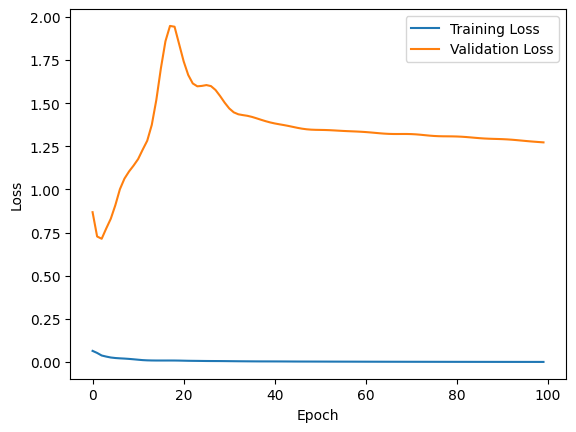

In [18]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()